In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=8aa0f6b4cc29721fd64aeb53d7fd42e6a4b98349ed8b45c4d3eeb2f76ef181f7
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
import pyspark

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark=SparkSession.builder.appName('practicse').getOrCreate()

In [5]:
spark

In [7]:
df_pyspark=spark.read.csv('heart_disease_data.csv')

In [8]:
df_pyspark.show()

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+----+----+------+
|_c0|_c1|_c2|     _c3| _c4|_c5|    _c6|    _c7|  _c8|    _c9| _c10|_c11|_c12|  _c13|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+----+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope|  ca|thal|target|
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|   0|   1|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|   0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|   0|   2|     1|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|   0|   2|     1|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|   0|   2|     1|
| 57|  1|  0|     140| 192|  0|      1|    148|    0|    0.4|    1|   0|   1|     1|
| 56|  0|  1|     140| 294|  0|      0|    153|    0|    1.3|    1|   0|   2|     1|
| 44|  1|  1|     120| 263|  0|      1|    173|    0|      0|    

In [9]:
df_pyspark=spark.read.option('header','true').csv('heart_disease_data.csv').show()

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
| 57|  1|  0|     140| 192|  0|      1|    148|    0|    0.4|    1|  0|   1|     1|
| 56|  0|  1|     140| 294|  0|      0|    153|    0|    1.3|    1|  0|   2|     1|
| 44|  1|  1|     120| 263|  0|      1|    173|    0|      0|    2|  0|   3|     1|
| 52|  1|  2|     172| 199|  1|      1|    162|    0|    0.5|    2|  0|   3|

In [10]:
df_pyspark = spark.read.csv("heart_disease_data.csv", header=True, inferSchema=True)


In [11]:
type(df_pyspark)

pyspark.sql.dataframe.DataFrame

In [12]:
df_pyspark.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trestbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalach: integer (nullable = true)
 |-- exang: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slope: integer (nullable = true)
 |-- ca: integer (nullable = true)
 |-- thal: integer (nullable = true)
 |-- target: integer (nullable = true)



In [13]:
df_pyspark.head(3)

[Row(age=63, sex=1, cp=3, trestbps=145, chol=233, fbs=1, restecg=0, thalach=150, exang=0, oldpeak=2.3, slope=0, ca=0, thal=1, target=1),
 Row(age=37, sex=1, cp=2, trestbps=130, chol=250, fbs=0, restecg=1, thalach=187, exang=0, oldpeak=3.5, slope=0, ca=0, thal=2, target=1),
 Row(age=41, sex=0, cp=1, trestbps=130, chol=204, fbs=0, restecg=0, thalach=172, exang=0, oldpeak=1.4, slope=2, ca=0, thal=2, target=1)]

In [14]:
df_pyspark.columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [15]:
df_pyspark.select('age').show()

+---+
|age|
+---+
| 63|
| 37|
| 41|
| 56|
| 57|
| 57|
| 56|
| 44|
| 52|
| 57|
| 54|
| 48|
| 49|
| 64|
| 58|
| 50|
| 58|
| 66|
| 43|
| 69|
+---+
only showing top 20 rows



In [16]:
type(df_pyspark.select('age'))

pyspark.sql.dataframe.DataFrame

In [17]:
df_pyspark.select(['age','cp']).show()

+---+---+
|age| cp|
+---+---+
| 63|  3|
| 37|  2|
| 41|  1|
| 56|  1|
| 57|  0|
| 57|  0|
| 56|  1|
| 44|  1|
| 52|  2|
| 57|  2|
| 54|  0|
| 48|  2|
| 49|  1|
| 64|  3|
| 58|  3|
| 50|  2|
| 58|  2|
| 66|  3|
| 43|  0|
| 69|  3|
+---+---+
only showing top 20 rows



In [18]:
df_pyspark.dtypes

[('age', 'int'),
 ('sex', 'int'),
 ('cp', 'int'),
 ('trestbps', 'int'),
 ('chol', 'int'),
 ('fbs', 'int'),
 ('restecg', 'int'),
 ('thalach', 'int'),
 ('exang', 'int'),
 ('oldpeak', 'double'),
 ('slope', 'int'),
 ('ca', 'int'),
 ('thal', 'int'),
 ('target', 'int')]

In [19]:
df_pyspark.describe().show()

+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|summary|               age|                sex|                cp|          trestbps|              chol|                fbs|          restecg|           thalach|              exang|           oldpeak|             slope|                ca|              thal|            target|
+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|  count|               303|                303|               303|               303|               303|                303|              303|               303|    

In [20]:
df_pyspark.withColumn('age2',df_pyspark['age']+2).show()

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+----+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|age2|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+----+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|  65|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|  39|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|  43|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|  58|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|  59|
| 57|  1|  0|     140| 192|  0|      1|    148|    0|    0.4|    1|  0|   1|     1|  59|
| 56|  0|  1|     140| 294|  0|      0|    153|    0|    1.3|    1|  0|   2|     1|  58|
| 44|  1|  1|     120| 263|  0|      1|    173|    0|    0.0|    2|  0|   3|     1|  46|
| 52|  1|  2|     172

In [21]:
df_pyspark=df_pyspark.drop('age1').show()

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
| 57|  1|  0|     140| 192|  0|      1|    148|    0|    0.4|    1|  0|   1|     1|
| 56|  0|  1|     140| 294|  0|      0|    153|    0|    1.3|    1|  0|   2|     1|
| 44|  1|  1|     120| 263|  0|      1|    173|    0|    0.0|    2|  0|   3|     1|
| 52|  1|  2|     172| 199|  1|      1|    162|    0|    0.5|    2|  0|   3|

In [22]:
df_pyspark=df_pyspark.withColumnRenamed('age','age1')

AttributeError: 'NoneType' object has no attribute 'withColumnRenamed'

In [27]:
from pyspark.sql.types import StructType,StructField,StringType,IntegerType

In [28]:
spark=SparkSession.builder.appName('example').getOrCreate()

In [29]:
schema=StructType([
    StructField('name',StringType(),True),
    StructField('age',IntegerType(),True),
    StructField('city',StringType(),True)
])

In [30]:
data=[("Alice",30,"NY"),
 ("Bob",None,"CH"),
    (None,25,"CA"),
    ("Charlie",35,None)
]

In [31]:
df=spark.createDataFrame(data=data,schema=schema)

In [ ]:
df.show()

In [ ]:
df.na.drop().show()

In [ ]:
df.na.drop(how='any',thresh=0).show()

In [ ]:
df.na.drop(how='any',subset=['age']).show()

In [ ]:
df.na.fill('Missing',['city','age']).show()

In [ ]:
from pyspark.ml.feature import Imputer

imputer=Imputer(
    inputCols=['age'],
    outputCols=['{}_imputed'.format(c) for c in ['age']]
).setStrategy('median')

In [ ]:
imputer.fit(df).transform(df).show()

In [32]:
schema=StructType([
    StructField('name',StringType(),True),
    StructField('age',IntegerType(),True),
    StructField('experience',IntegerType(),True)
])
data=[("Alice",30,12),
 ("Bob",25,15),
    (None,25,13),
    ("Charlie",35,2)
]

In [33]:
df = spark.createDataFrame(data, schema=schema)

In [34]:
df.show()

+-------+---+----------+
|   name|age|experience|
+-------+---+----------+
|  Alice| 30|        12|
|    Bob| 25|        15|
|   NULL| 25|        13|
|Charlie| 35|         2|
+-------+---+----------+



In [35]:
from pyspark.ml.feature import VectorAssembler

In [36]:
featureassembler=VectorAssembler(inputCols=['age','experience'],outputCol='features')

In [37]:
output=featureassembler.transform(df)

In [38]:
output.show()

+-------+---+----------+-----------+
|   name|age|experience|   features|
+-------+---+----------+-----------+
|  Alice| 30|        12|[30.0,12.0]|
|    Bob| 25|        15|[25.0,15.0]|
|   NULL| 25|        13|[25.0,13.0]|
|Charlie| 35|         2| [35.0,2.0]|
+-------+---+----------+-----------+



#LinearRegression

![image.png](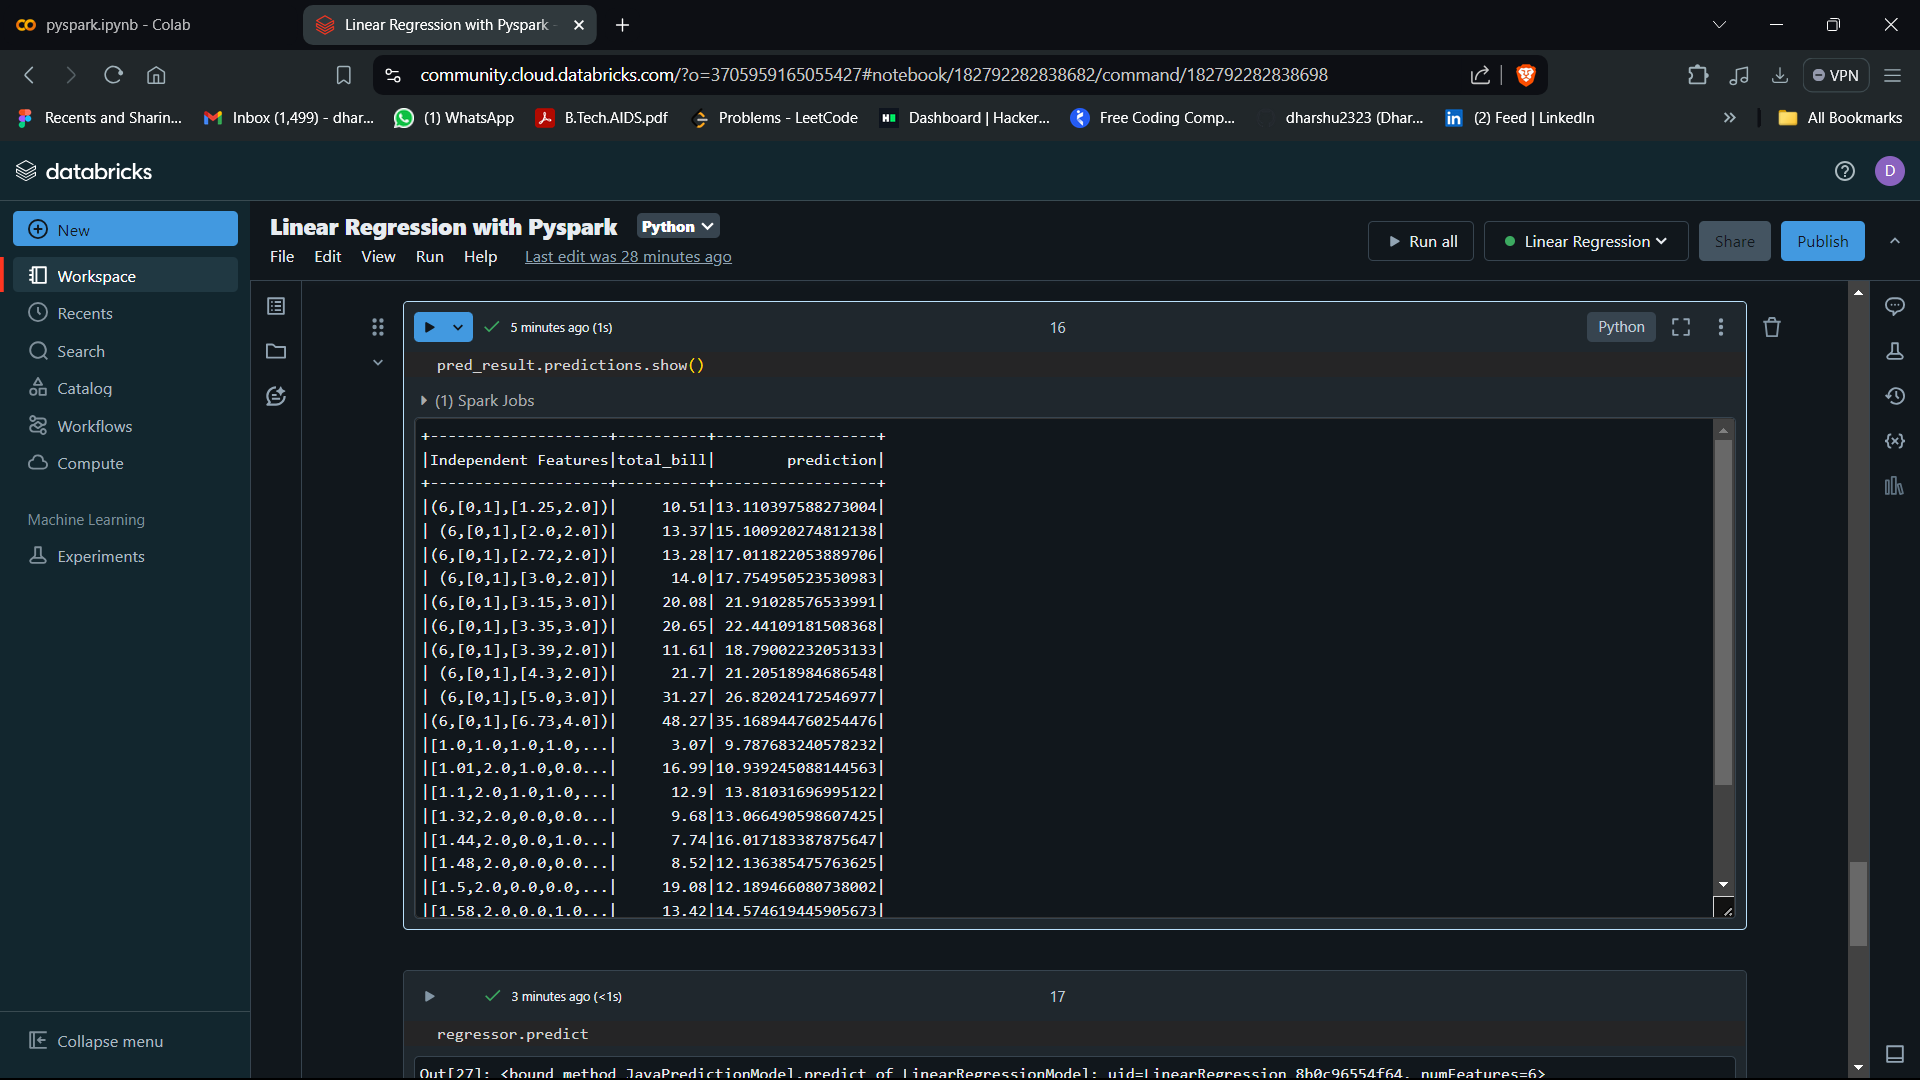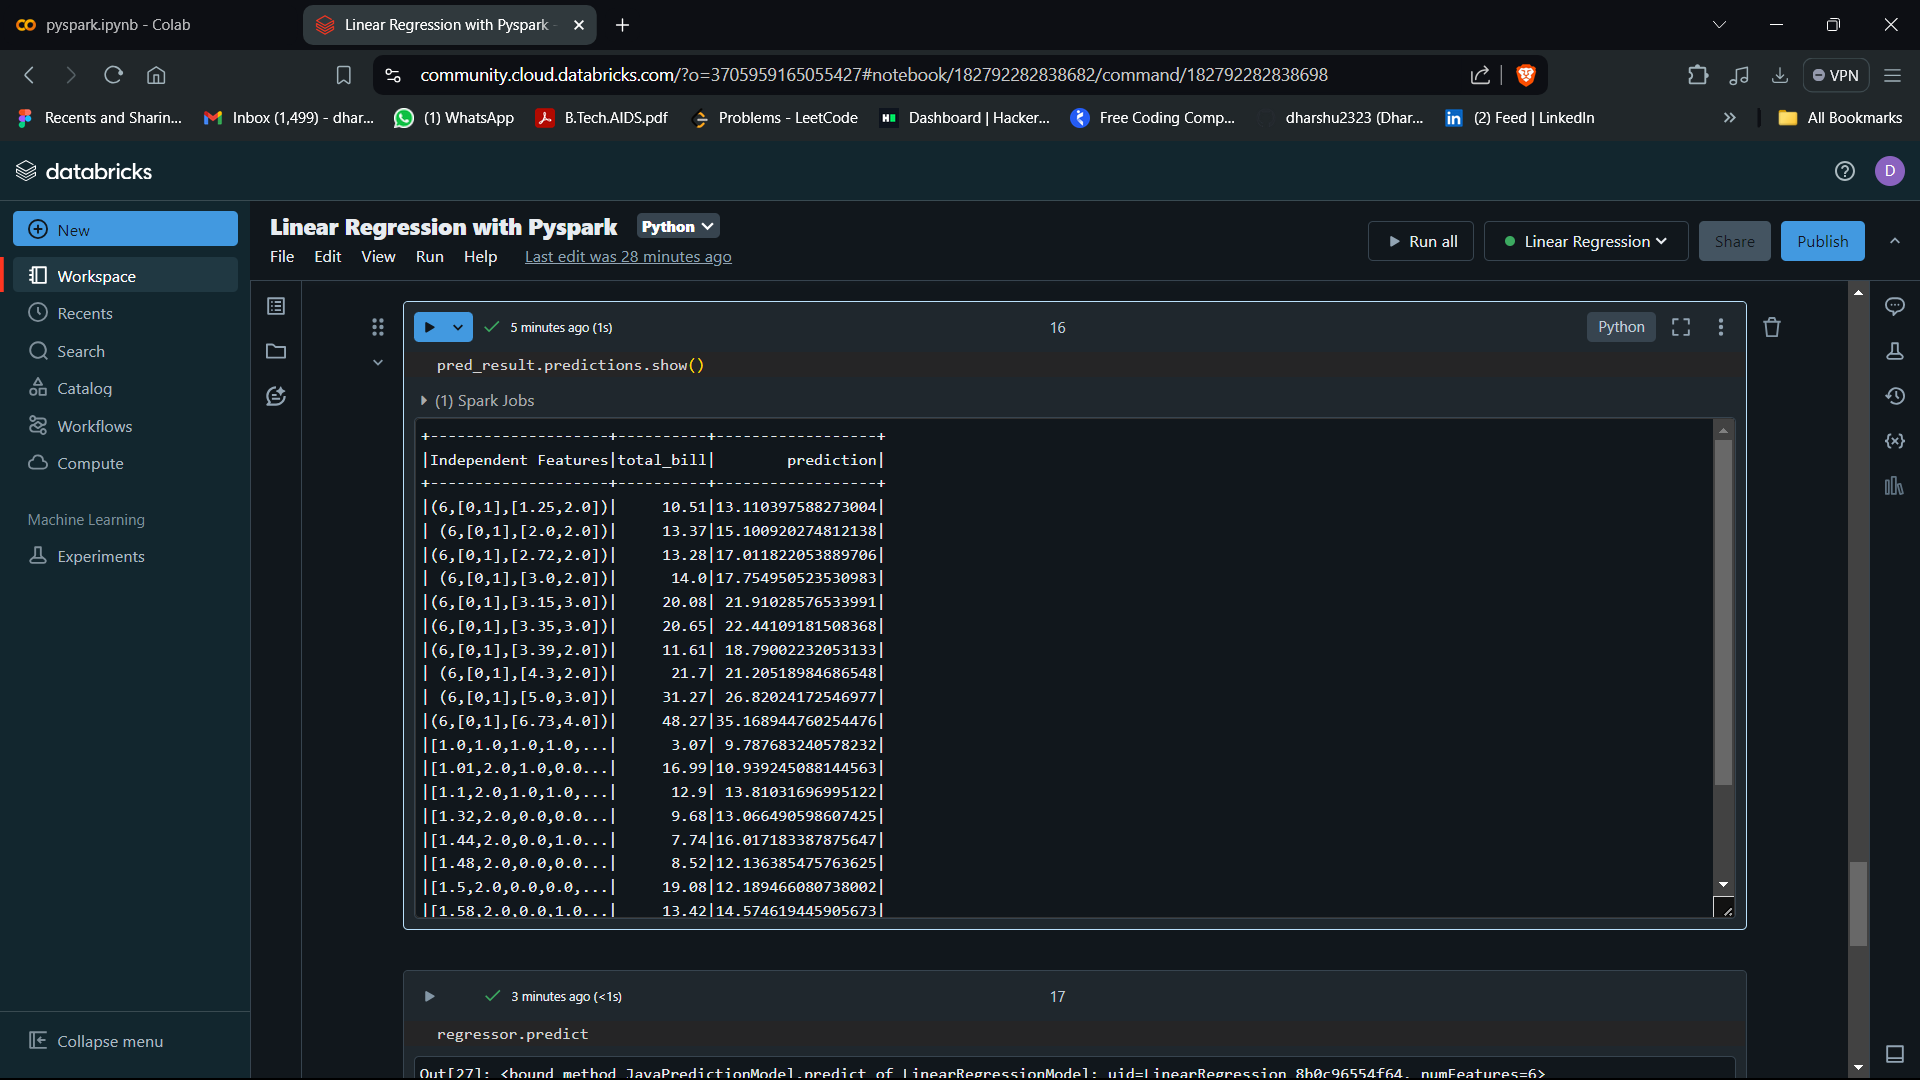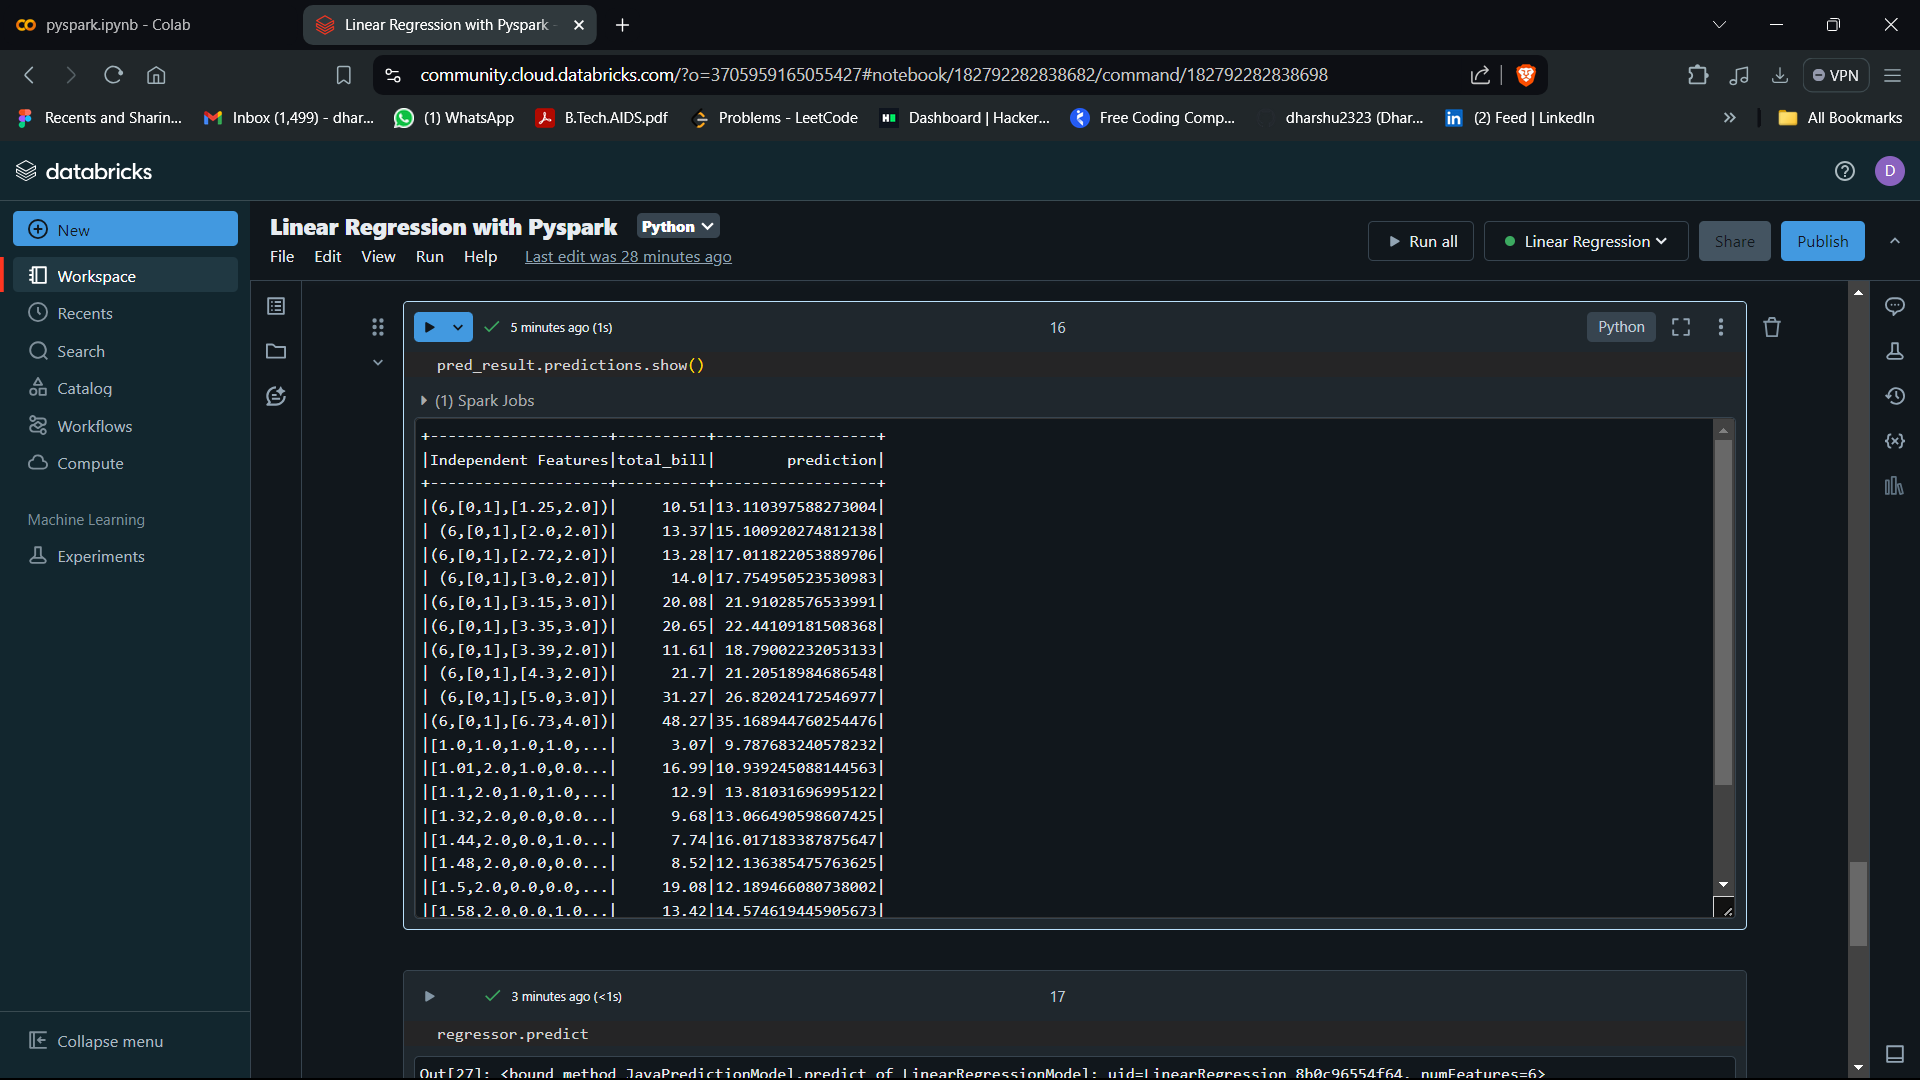)